In [122]:
import pandas as pd

# importar dados e visualizar tabela
tabela = pd.read_csv('Historico.csv')

# verificação dos dados. frequência como object. ocorrência de null nas tabelas nota, frequência, situação
display(tabela)
print(tabela.info())


,Semestre,Ano,Disciplina,CH,Nota,Frequencia,Situacao,Observacao,Codigo,Periodo
0,2,2015,Anatomia dos Animais Domesticos,60,74.0,90%,Aprovado,NaN,BA044,1
1,2,2015,Expressao Grafica,60,82.0,91%,Aprovado,NaN,CEG012,1
2,2,2015,Fundamentos de Programacao de Computadores,60,100.0,100%,Aprovado,NaN,CI182,1
3,2,2015,Fisica para Agronomia I,30,69.0,100%,Aprovado,NaN,CF107,1
4,2,2015,Introducao a Engenharia Agronomica,30,80.0,100%,Aprovado,NaN,AF062,1
...,...,...,...,...,...,...,...,...,...,...
85,1,2020,"Legislacao Rural, Pericia e Avaliacao",45,NaN,NaN,NaN,Cancelado,AE073,10
86,1,2020,Trabalho de Conclusao de Curso,12,100.0,100%,Aprovado,NaN,AGRO003,10
87,3,2020,"Legislacao Rural, Pericia e Avaliacao",45,100.0,100%,Aprovado,NaN,AE073,11
88,3,2021,Estagio Supervisionado,240,100.0,100%,Aprovado,NaN,AGRO002,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Semestre    90 non-null     int64  
 1   Ano         90 non-null     int64  
 2   Disciplina  90 non-null     object 
 3   CH          90 non-null     int64  
 4   Nota        89 non-null     float64
 5   Frequencia  86 non-null     object 
 6   Situacao    89 non-null     object 
 7   Observacao  10 non-null     object 
 8   Codigo      90 non-null     object 
 9   Periodo     90 non-null     int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 7.2+ KB
None


In [123]:
# alteração do tipo de dado em frequência
tabela['Frequencia'] = tabela['Frequencia'].str.replace('%','').astype(float)
print(tabela.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Semestre    90 non-null     int64  
 1   Ano         90 non-null     int64  
 2   Disciplina  90 non-null     object 
 3   CH          90 non-null     int64  
 4   Nota        89 non-null     float64
 5   Frequencia  86 non-null     float64
 6   Situacao    89 non-null     object 
 7   Observacao  10 non-null     object 
 8   Codigo      90 non-null     object 
 9   Periodo     90 non-null     int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 7.2+ KB
None


In [124]:
# exclusão de discipla cancelada
filtro_cancelado = tabela[tabela['Observacao'] == 'Cancelado']
print(filtro_cancelado)
tabela = tabela[tabela['Situacao'].notna()]
print(tabela)




    Semestre   Ano                             Disciplina  CH  Nota  \
85         1  2020  Legislacao Rural, Pericia e Avaliacao  45   NaN   

    Frequencia Situacao Observacao Codigo  Periodo  
85         NaN      NaN  Cancelado  AE073       10  
    Semestre   Ano                                  Disciplina   CH   Nota  \
0          2  2015             Anatomia dos Animais Domesticos   60   74.0   
1          2  2015                           Expressao Grafica   60   82.0   
2          2  2015  Fundamentos de Programacao de Computadores   60  100.0   
3          2  2015                     Fisica para Agronomia I   30   69.0   
4          2  2015          Introducao a Engenharia Agronomica   30   80.0   
..       ...   ...                                         ...  ...    ...   
84         3  2019             Basic Concepts of Rural Science   30   95.0   
86         1  2020              Trabalho de Conclusao de Curso   12  100.0   
87         3  2020       Legislacao Rural, Perici

In [125]:
# localizar e substituir NaN por Aproveitamento nas linhas faltando
filtro_frequencia = tabela.loc[tabela['Frequencia'].isnull()]
filtro_freq = filtro_frequencia.loc[tabela['Observacao'].isnull()]
display(filtro_freq)
tabela['Observacao'][67] = 'Aproveitamento'
tabela['Observacao'][68] = 'Aproveitamento'

# posteriormente é encontrado um erro na CH do TCC e na situacao da disciplina Energia na Agricultura
tabela['CH'][86] = 120

# erro encontrado
# tabela.query('Nota < 50')
tabela['Situacao'][66] = 'Reprovado'

,Semestre,Ano,Disciplina,CH,Nota,Frequencia,Situacao,Observacao,Codigo,Periodo
67,1,2019,Experimentacao Agricola,60,30.0,NaN,Reprovado,NaN,AF064,8
68,1,2019,"Legislacao Rural, Pericia e Avaliacao",45,30.0,NaN,Reprovado,NaN,AE073,8


C:\Users\ARAMIS~1\AppData\Local\Temp/ipykernel_3456/3564512169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela['Observacao'][68] = 'Aproveitamento'


In [126]:
# Total de disciplinas realizadas
tabela.count()
# 89 disciplinas

Semestre      89
Ano           89
Disciplina    89
CH            89
Nota          89
Frequencia    86
Situacao      89
Observacao    11
Codigo        89
Periodo       89
dtype: int64

In [127]:
# Carga horária total
tabela.groupby('Situacao').sum()

# Carga horária por semestre
tabela.groupby('Periodo').sum()



,Semestre,Ano,CH,Nota,Frequencia
Periodo,,,,,
1,20,20150,480,705.0,905.0
2,8,16128,465,577.0,732.0
3,18,18144,525,628.0,835.0
4,9,18153,480,594.0,731.0
5,18,18153,480,439.0,704.0
6,8,16144,420,527.0,701.0
7,23,22198,510,779.0,1007.0
8,12,24228,600,786.0,932.0
9,19,18171,480,662.0,790.0


In [128]:
# Média de nota/freq total
round(tabela.mean(), 2)

# Média de nota/freq por semestre
round(tabela.groupby('Periodo').mean(), 2)



C:\Users\ARAMIS~1\AppData\Local\Temp/ipykernel_3456/3429298318.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  round(tabela.mean(), 2)


,Semestre,Ano,CH,Nota,Frequencia
Periodo,,,,,
1,2.00,2015.0,48.00,70.50,90.50
2,1.00,2016.0,58.12,72.12,91.50
3,2.00,2016.0,58.33,69.78,92.78
4,1.00,2017.0,53.33,66.00,91.38
5,2.00,2017.0,53.33,48.78,78.22
6,1.00,2018.0,52.50,65.88,87.62
7,2.09,2018.0,46.36,70.82,91.55
8,1.00,2019.0,50.00,65.50,93.20
9,2.11,2019.0,53.33,73.56,87.78


In [129]:
# Disciplinas com maiores notas
tabela.sort_values('Nota', ascending=False)
# Disciplinas com menores notas
tabela.sort_values('Nota')
# Disciplinas com maiores frequências
tabela.sort_values('Frequencia', ascending=False)
# Disciplinas com menores frequências
tabela.sort_values('Frequencia')
# Número de reprovações
tabela['Situacao'].value_counts()
# Número de optativas
tabela['Observacao'].value_counts()
# Aplicar departamento ao código
tabela['Departamento'] = ""



In [130]:
deptoSolos = tabela.query('Codigo.str.startswith("AL")',engine="python")
deptoFito = tabela.query('Codigo.str.startswith("AF")',engine="python")
deptoEcon = tabela.query('Codigo.str.startswith("AE")',engine="python")
deptoExte = tabela.query('Codigo.str.startswith("HC")',engine="python")
deptoBio = tabela.query('Codigo.str.startswith("B")',engine="python")
deptoZoo = tabela.query('Codigo.str.startswith("AZ")',engine="python")
deptoExa = tabela.query('Codigo.str.startswith("C")',engine="python")
deptoGeo = tabela.query('Codigo.str.startswith("G")',engine="python")
deptoFlo = tabela.query('Codigo.str.startswith("AS")',engine="python")
deptoForm = tabela.query('Codigo.str.startswith("AGRO")',engine="python")

In [131]:
deptoSolos['Departamento'] = "Solos"
deptoFito['Departamento'] = "Fitotecnia e Fitossanitarismo"
deptoEcon['Departamento'] = "Economia e Extensao Rural"
deptoExte['Departamento'] = "Economia e Extensao Rural"
deptoBio['Departamento'] = "Biologicas"
deptoZoo['Departamento'] = "Zootecnia"
deptoExa['Departamento'] = "Exatas"
deptoGeo['Departamento'] = "Exatas"
deptoFlo['Departamento'] = "Exatas"
deptoForm['Departamento'] = "Formativas"
departamentos = [deptoSolos, deptoFito, deptoEcon, deptoExte, deptoBio, deptoZoo, deptoExa, deptoForm]

C:\Users\ARAMIS~1\AppData\Local\Temp/ipykernel_3456/922130031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deptoSolos['Departamento'] = "Solos"
C:\Users\ARAMIS~1\AppData\Local\Temp/ipykernel_3456/922130031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deptoFito['Departamento'] = "Fitotecnia e Fitossanitarismo"
C:\Users\ARAMIS~1\AppData\Local\Temp/ipykernel_3456/922130031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [132]:
tabela1 = deptoSolos.append([deptoFito, deptoEcon, deptoExte, deptoBio, deptoZoo, deptoExa, deptoGeo, deptoFlo, deptoForm])
tabela1

,Semestre,Ano,Disciplina,CH,Nota,Frequencia,Situacao,Observacao,Codigo,Periodo,Departamento
18,2,2016,Agrometeorologia,60,76.0,100.0,Aprovado,NaN,AL055,3,Solos
25,2,2016,Tecnologia dos Produtos Agricolas,90,86.0,100.0,Aprovado,NaN,AL019,3,Solos
29,1,2017,"Fundamentos de Hidrologia, Irrigacao e Drenagem",30,72.0,86.0,Aprovado,NaN,AL013,4,Solos
31,1,2017,Geoprocessamento na Avaliacao do Meio Fisico,60,51.0,100.0,Aprovado,NaN,AL011,4,Solos
33,1,2017,Pedologia,60,67.0,86.0,Aprovado,NaN,AL012,4,Solos
...,...,...,...,...,...,...,...,...,...,...,...
22,2,2016,Introducao aos Sistemas de Informacao Geografica,45,72.0,80.0,Aprovado,NaN,GA086,3,Exatas
23,2,2016,Recursos Florestais na Propriedade Agricola I,30,69.0,93.0,Aprovado,NaN,AS109,3,Exatas
35,1,2017,Recursos Florestais na Propriedade Agricola II,60,73.0,100.0,Aprovado,NaN,AS110,4,Exatas
86,1,2020,Trabalho de Conclusao de Curso,120,100.0,100.0,Aprovado,NaN,AGRO003,10,Formativas


In [133]:
# Avaliar desempenho por departamento (separar por biológicas, exatas (matemática, física, estatística e programação), química, geografia, fitotecnia e fitossanitarismo, solos, zootecnia, economia e extensão e formativas(código AGRO)
import seaborn as sns
import matplotlib.pyplot as plt
depto_media = pd.DataFrame(round(tabela1.groupby('Departamento').mean(), 2))
depto_media['Departamento'] = depto_media.index
depto_media = depto_media.drop(columns=['Ano','Semestre','Periodo','CH'])
depto_media

,Nota,Frequencia,Departamento
Departamento,,,
Biologicas,68.27,91.50,Biologicas
Economia e Extensao Rural,67.80,90.00,Economia e Extensao Rural
Exatas,67.27,91.40,Exatas
Fitotecnia e Fitossanitarismo,64.04,88.41,Fitotecnia e Fitossanitarismo
Formativas,100.00,100.00,Formativas
Solos,69.33,88.38,Solos
Zootecnia,74.00,93.25,Zootecnia


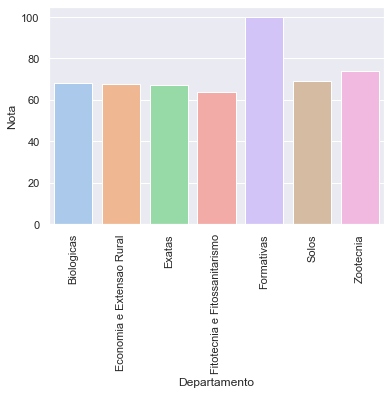

In [134]:
sns.set_theme(style='darkgrid', palette='pastel')
grafico_nota = sns.barplot(x=tabela_depto['Departamento'], y = tabela_depto['Nota'])
grafico_nota = grafico_nota.set_xticklabels(labels = tabela_depto['Departamento'], rotation=90)


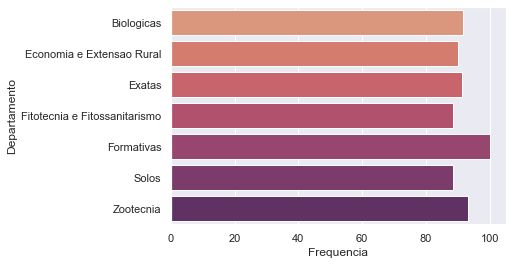

In [135]:
grafico_pres = sns.barplot(x=depto_media['Frequencia'], y = depto_media['Departamento'], orient='h', palette='flare' )

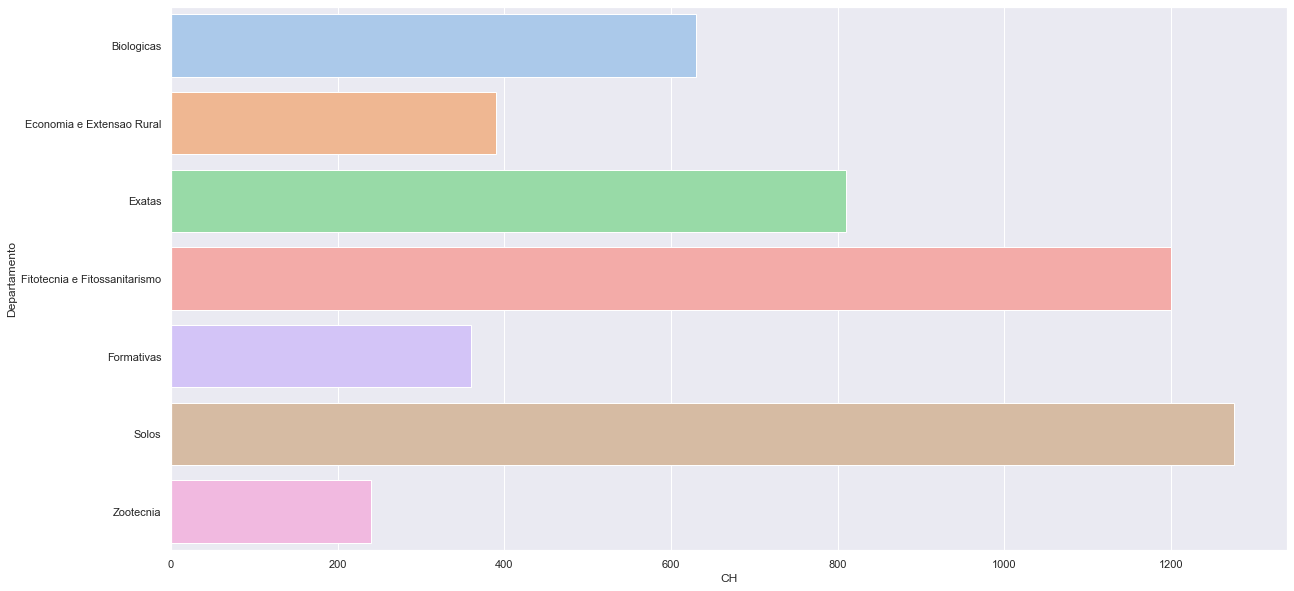

In [153]:
depto_max = pd.DataFrame(round(tabela1.groupby('Departamento').sum()))
depto_max = depto_max.drop(columns=['Semestre', 'Ano', 'Nota','Frequencia','Periodo'])
plt.figure(figsize=(20,10))
sns.barplot(data=depto_max, x='CH', y=depto_max.index)
plt.show()

In [284]:
# importar ferramentas e correção de inconsistência de um dado.
# Genética Vegetal consta como aprovação por aproveitamento, portanto sem frequência, para isso haverá substituição do NaN por valor da média de frequência do departamento (88.41)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split

tabela_aprovado = tabela1[tabela1['Situacao']=='Aprovado']
tabela_aprovado[tabela_aprovado['Frequencia'].isna()]
tabela_aprovado['Frequencia'][30] = 88.41
tabela_aprovado.corr()



C:\Users\ARAMIS~1\AppData\Local\Temp/ipykernel_3456/3285108031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_aprovado['Frequencia'][30] = 88.41


,Semestre,Ano,Disciplina,CH,Nota,Frequencia,Situacao,Observacao,Codigo,Periodo,Departamento
18,2,2016,Agrometeorologia,60,76.0,100.0,Aprovado,NaN,AL055,3,Solos
25,2,2016,Tecnologia dos Produtos Agricolas,90,86.0,100.0,Aprovado,NaN,AL019,3,Solos
29,1,2017,"Fundamentos de Hidrologia, Irrigacao e Drenagem",30,72.0,86.0,Aprovado,NaN,AL013,4,Solos
31,1,2017,Geoprocessamento na Avaliacao do Meio Fisico,60,51.0,100.0,Aprovado,NaN,AL011,4,Solos
33,1,2017,Pedologia,60,67.0,86.0,Aprovado,NaN,AL012,4,Solos
...,...,...,...,...,...,...,...,...,...,...,...
22,2,2016,Introducao aos Sistemas de Informacao Geografica,45,72.0,80.0,Aprovado,NaN,GA086,3,Exatas
23,2,2016,Recursos Florestais na Propriedade Agricola I,30,69.0,93.0,Aprovado,NaN,AS109,3,Exatas
35,1,2017,Recursos Florestais na Propriedade Agricola II,60,73.0,100.0,Aprovado,NaN,AS110,4,Exatas
86,1,2020,Trabalho de Conclusao de Curso,120,100.0,100.0,Aprovado,NaN,AGRO003,10,Formativas


In [324]:
x = tabela_aprovado.drop(columns=['Semestre', 'Ano', 'Disciplina', 'CH', 'Situacao', 'Observacao','Codigo', 'Periodo','Frequencia','Departamento'])
y = tabela_aprovado['Frequencia']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [325]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
test_pred_rf = rf_reg.predict(x_test)
ln_reg = LinearRegression()
ln_reg.fit(x_train,y_train)
test_pred_ln = ln_reg.predict(x_test)

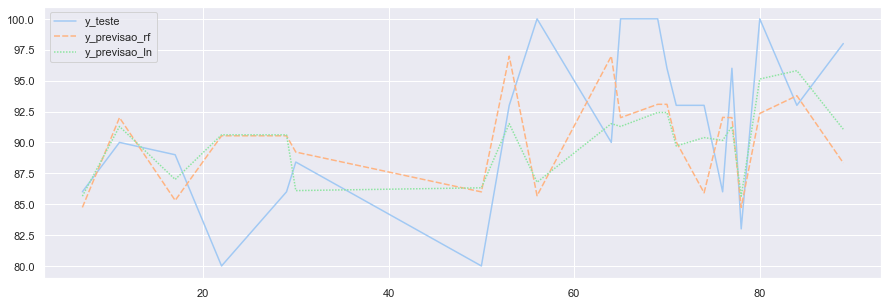

,y_teste,y_previsao_rf,y_previsao_ln
89,98.00,88.336667,91.065530
50,80.00,85.994500,86.324324
56,100.00,85.685333,86.775867
7,86.00,84.737000,85.647009
74,93.00,85.919345,90.388215
84,93.00,93.780000,95.806736
11,90.00,92.002738,91.291302
22,80.00,90.535333,90.613987
78,83.00,84.737000,85.647009
17,89.00,85.304000,87.001639


In [327]:
graf_result = pd.DataFrame()
graf_result['y_teste'] = y_test
graf_result['y_previsao_rf'] = test_pred_rf
graf_result['y_previsao_ln'] = test_pred_ln
fig2=plt.figure(figsize=(15,5))
sns.lineplot(data=graf_result)
plt.show()
display(graf_result)